Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')
                                                text  label_num
0  Subject: enron methanol ; meter # : 988291\r\n...          0
1  Subject: hpl nom for january 9 , 2001\r\n( see...          0
2  Subject: neon retreat\r\nho ho ho , we ' re ar...          0
3  Subject: photoshop , windows , office . cheap ...          1
4  Subject: re : indian springs\r\nthis deal is t...          0
(5171, 2)
(4993, 2)


[nltk_data] Downloading package stopwords to /home/kali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


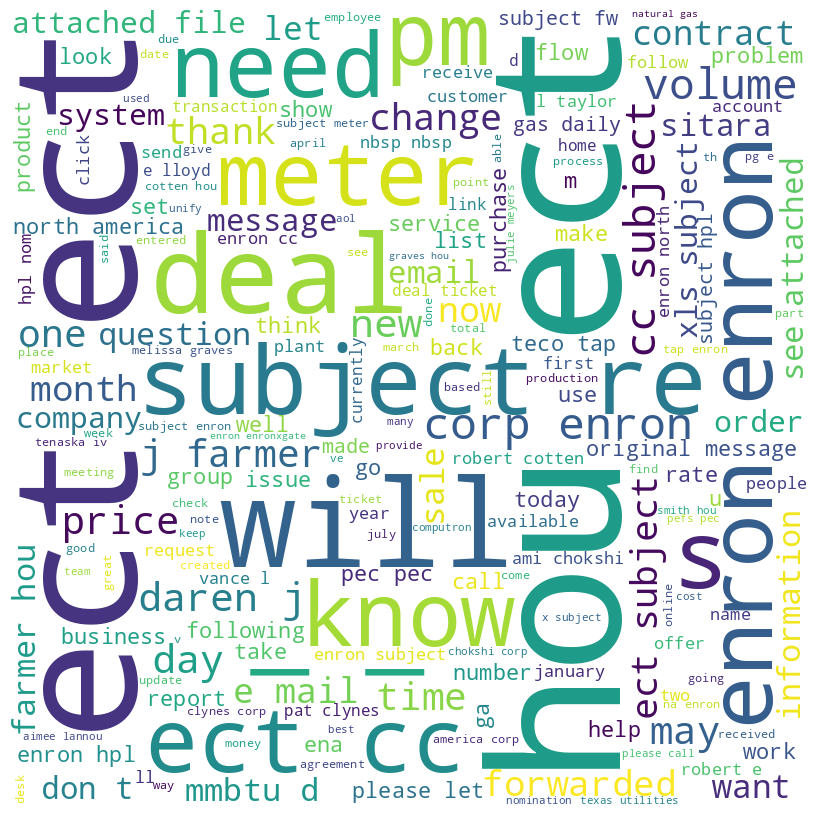

In [3]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import sklearn
import nltk
from nltk.corpus import stopwords

def get_precision(pred, test):
    mistake = 0
    for i in range(len(pred)):
        if(pred[i] == test[i]):
            mistake += 1
            
    mistake = mistake/len(pred)
    print("Precision: ", mistake)

df = pd.read_csv('spam_ham_dataset.csv')
print(df.columns)
df = df.drop("label", axis = 1)
df = df.drop("Unnamed: 0", axis = 1)
print(df.head(5))
print(df.shape)
df.drop_duplicates(inplace = True)
print(df.shape)
df.isnull().sum()
nltk.download('stopwords')

def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_words

df['text'].head().apply(process_text)
'''
from sklearn.feature_extraction.text import CountVectorizer
messages_bow = CountVectorizer(analyzer=process_text).fit_transform(df['text'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages_bow, df['label_num'], test_size = 0.20, random_state = 0)
messages_bow.shape

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

predicted = classifier.predict(X_train)
print(predicted)
print(y_train.values)
get_precision(predicted, y_train.values)

'''

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
comment_words = ''

for val in df.text:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
                   
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#WORDCLOUD IS NOT WORKING RIGHT